# PERSONAL BANK LOAN ANALYSIS

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

## Dataset overview

In [87]:
df = pd.read_csv("/Users/soniaborsi/Desktop/Bank_Personal_Loan_Modelling.csv")
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0/40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1/50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0/30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0/60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8/90,3,0,1,0,0,0,0


In [88]:
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2/00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1/90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0/50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6/67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2/00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0/80,1,0,0,0,0,1,1


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [90]:
df.isnull().sum().sum()

0

ID: ID of the customer

Age: Age of the customer in completed years

Experience: Amount of work experience in years

Income: Amount of annual income (in thousands)

Zipcode: Postal code in which the client lives

Family: Number of family members

CCAvg: Average monthly spending with the credit card (in thousands)

Education: Education level (1: bachelor's degree, 2: master's degree, 3: advanced/professional degree)

- Mortgage: Value of home mortgage, if any (in thousands)

- Securities Account: Does the customer have a securities account with the bank?

- CD Account: Does the customer have a certificate of deposit account (CD) with the bank?

- Online: Does the customer use the internet banking facilities?

- CreditCard: Does the customer use a credit card issued by the bank?

- Personal Loan: Did this customer accept the personal loan offered in the last campaign? (Target Variable)



In [91]:
df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [92]:
pd.set_option('display.max_rows', 20)
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.50,1443.52,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.34,11.46,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.10,11.47,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.77,46.03,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.50,2121.85,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.40,1.15,1.0,1.00,2.0,3.00,4.0
Education,5000.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.00,0.0,0.00,1.0


In [93]:
df.duplicated().sum()

0

In [94]:
df['CCAvg'] 

0       1/60
1       1/50
2       1/00
3       2/70
4       1/00
        ... 
4995    1/90
4996    0/40
4997    0/30
4998    0/50
4999    0/80
Name: CCAvg, Length: 5000, dtype: object

In [99]:
df['CCAvg'] = df['CCAvg'].astype(str).str.replace('/', '.')
df['CCAvg'] = pd.to_numeric(df['CCAvg'], errors='coerce')

df['CCAvg']

0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 5000, dtype: float64

## Data cleaning

1. remove negative values from experience

In [52]:
df[df['Experience']<0]['Experience'].count()

52

In [ ]:
plt.subplot()

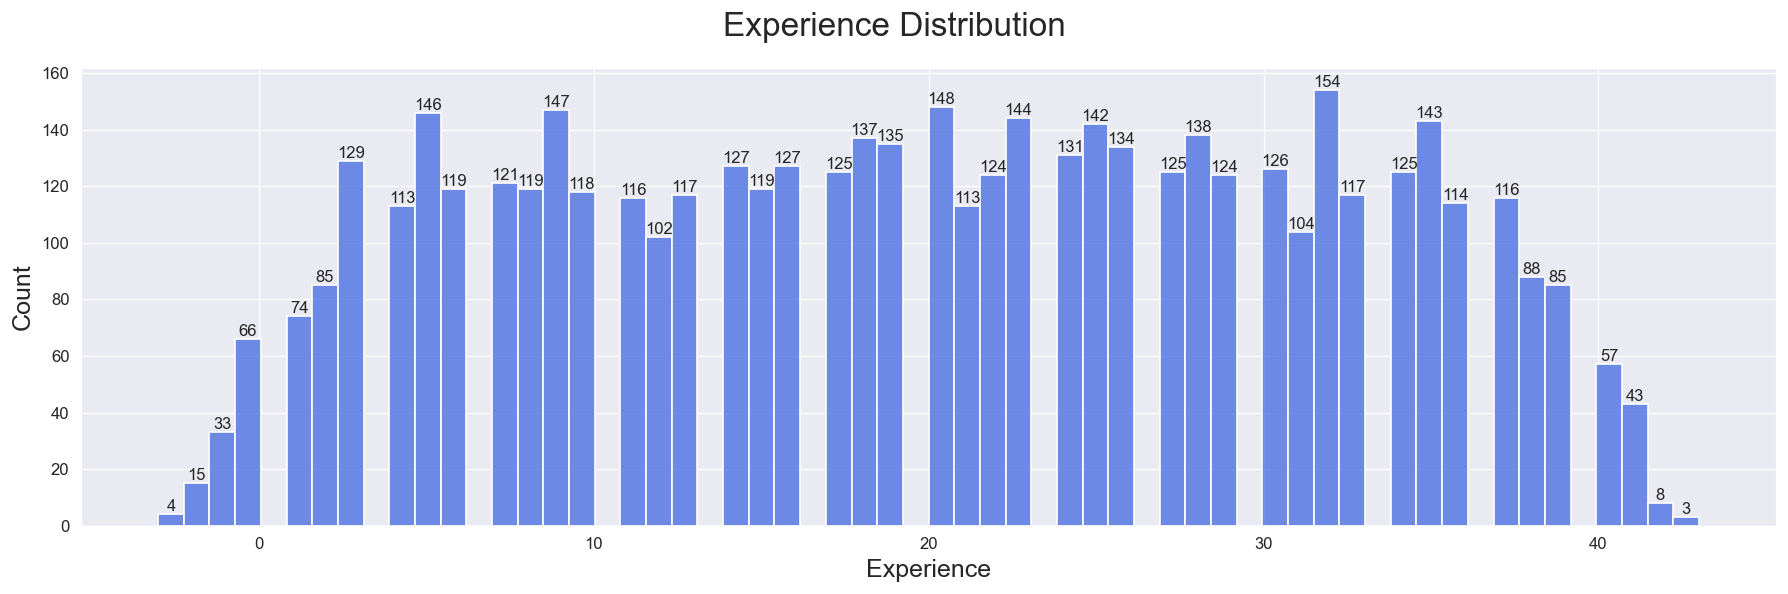

In [53]:
# Set the style of the graph
sns.set_style('darkgrid')
color = 'royalblue'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x='Experience', data=df, bins=60, color=color)

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.annotate('Noise', xy=(10000,60), xytext=(12000,400), color=color, fontsize=15, 
             arrowprops=dict(facecolor=color, shrink=0.01))
plt.xlabel('Experience', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('Experience Distribution', fontsize=20)
plt.tight_layout()
plt.show()

In [54]:
df[df['Experience']<0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [55]:
df['Experience'] = df['Experience'].apply(abs)

3. remove outliers from mortage (?)

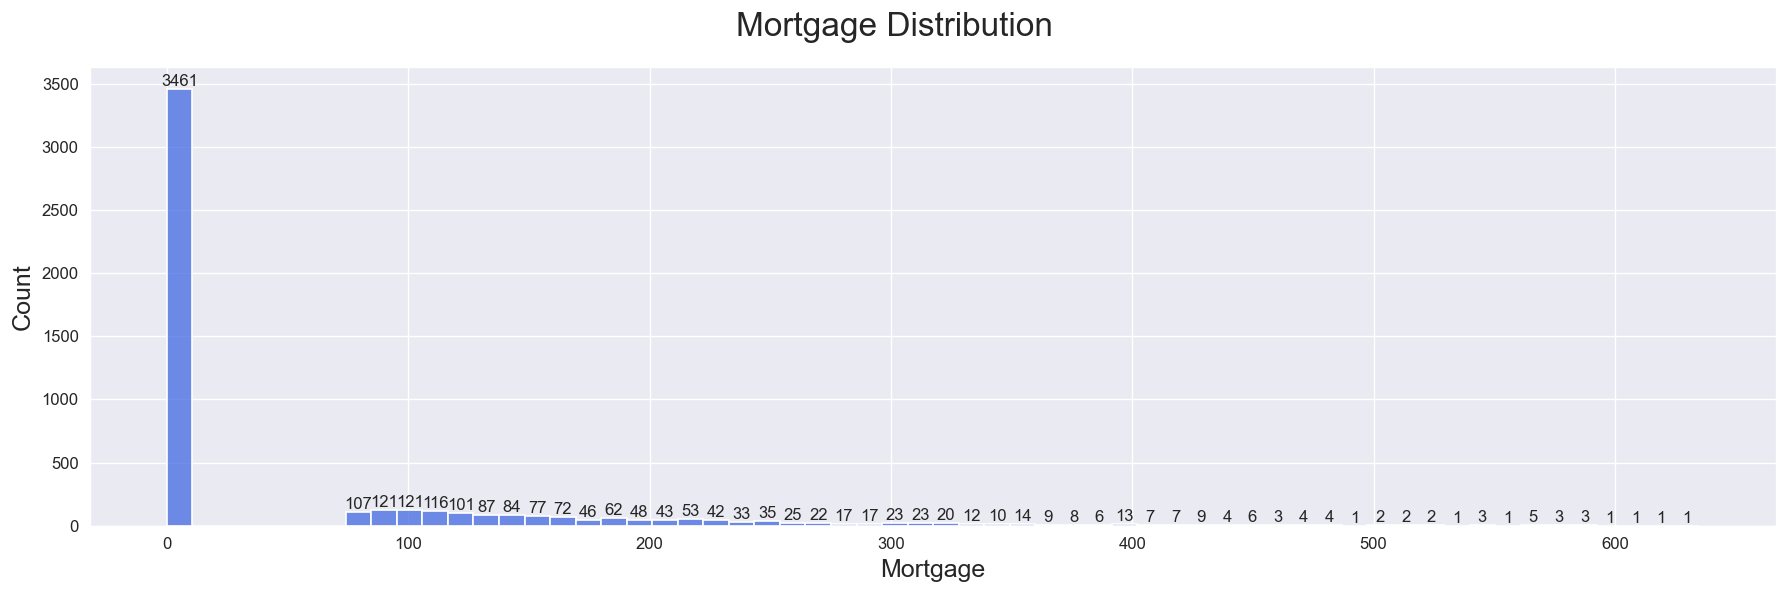

In [60]:
# Set the style of the graph
sns.set_style('darkgrid')
color = 'royalblue'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x='Mortgage', data=df, bins=60, color=color)

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.annotate('Noise', xy=(10000,60), xytext=(12000,400), color=color, fontsize=15, 
             arrowprops=dict(facecolor=color, shrink=0.01))
plt.xlabel('Mortgage', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('Mortgage Distribution', fontsize=20)
plt.tight_layout()
plt.show()

4. ZIP code

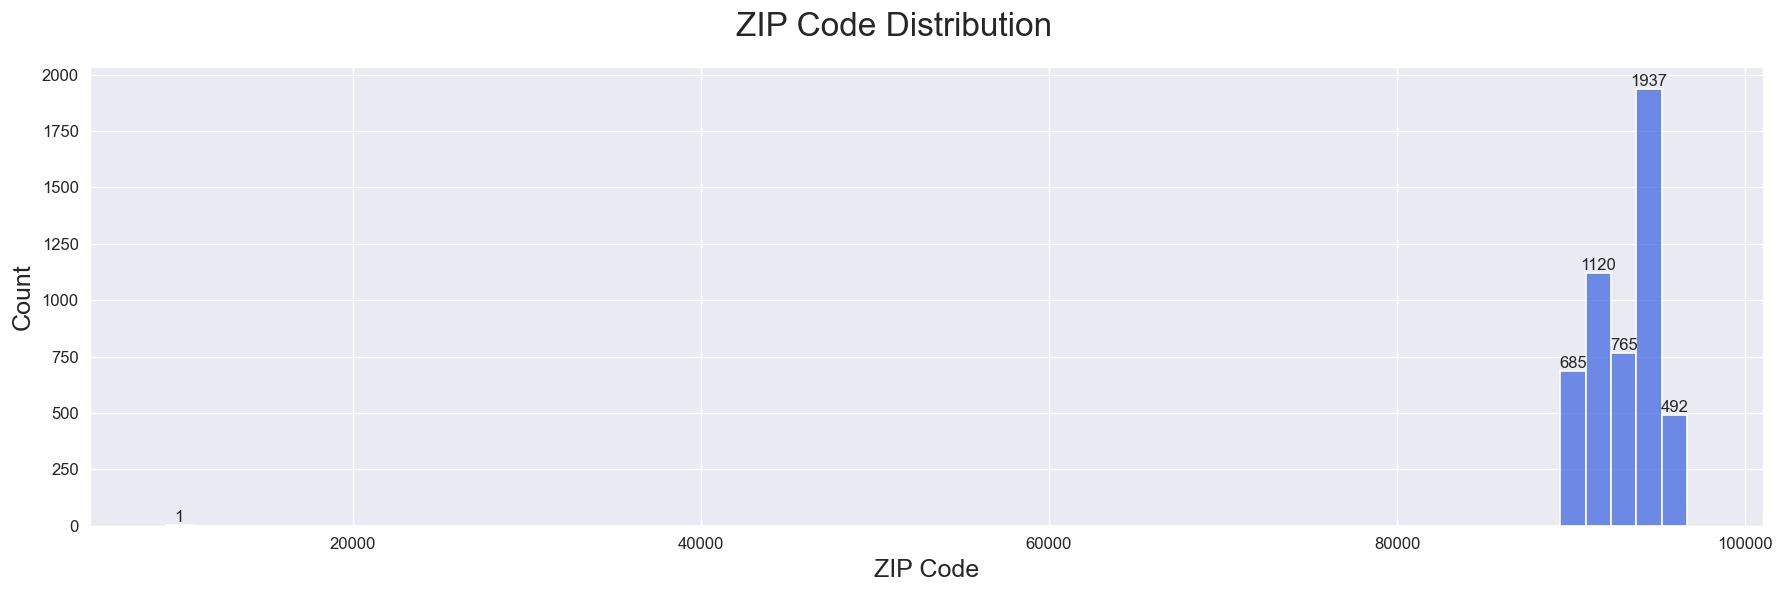

In [57]:
# Set the style of the graph
sns.set_style('darkgrid')
color = 'royalblue'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x='ZIP Code', data=df, bins=60, color=color)

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.xlabel('ZIP Code', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('ZIP Code Distribution', fontsize=20)
plt.tight_layout()
plt.show()

In [112]:
df.drop(df[df['ZIP Code']<20000].index, inplace=True)
df.reset_index(drop=True, inplace =True)

## Divide in train and test

### Oversampling for unbalanced classes

In [106]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [123]:

X = df.drop('Personal Loan', axis=1)  # Features
y = df['Personal Loan']  # Target

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Personal Loan'])], axis=1)


In [124]:
df_resampled['Personal Loan'].value_counts()

Personal Loan
0    4519
1    4519
Name: count, dtype: int64

### Divide in train and test resampled df

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(7230, 13) (7230,)
(1808, 13) (1808,)


## Models

## Logistic Regression

In [195]:
scaler = StandardScaler()

pipeline_logreg = Pipeline([
    ('scaler', scaler),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

In [196]:
pipeline_logreg.fit(X_train, y_train)
y_pred_logreg = pipeline_logreg.predict(X_test)

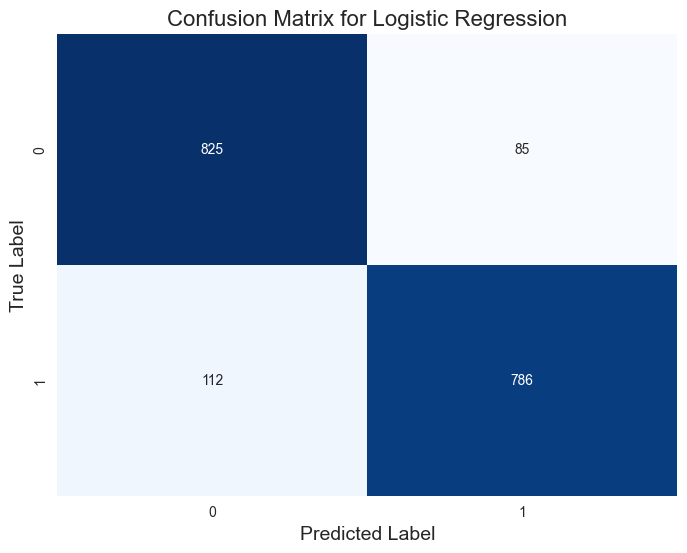

In [197]:
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

In [198]:
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, pipeline_logreg.predict_proba(X_test)[:, 1]
)

metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc_logreg]
})

metrics_table

,Metric,Score
0,Accuracy,0.891040
1,Precision,0.902411
2,Recall,0.875278
3,F1 Score,0.888638
4,ROC AUC,0.960586


## Random Forest

In [220]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],            # Reducing the number of trees
    'max_depth': [3, 5, 7],                    # Restricting tree depth
    'min_samples_split': [10, 15, 20],         # Increasing minimum samples to split
    'min_samples_leaf': [5, 10],               # Increasing minimum samples per leaf
    'bootstrap': [True]                        # Using bootstrap samples
}


In [221]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Add class_weight if dataset is imbalance
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=10, n_jobs=-1, verbose=1)  # Increase cv to 10

In [222]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [223]:
print("Best params:")
print(grid_search.best_params_)

Best params:
{'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


### Predict using best rf

In [231]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       910
           1       0.98      1.00      0.99       898

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



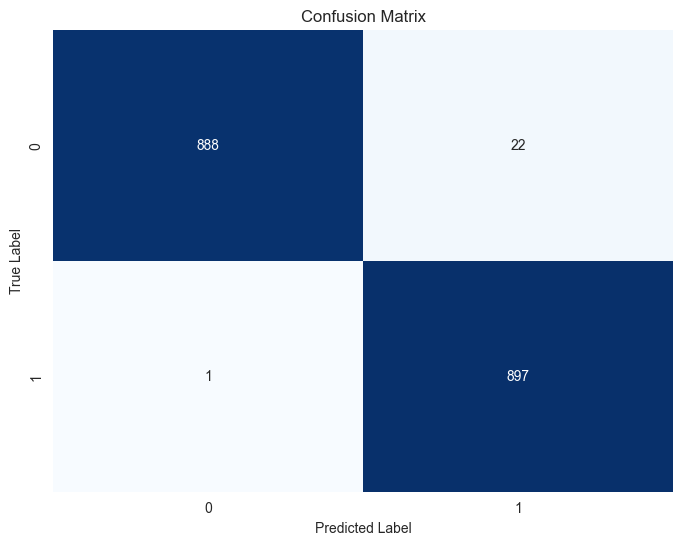

In [232]:
conf_matrix_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [217]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

metrics_table

,Metric,Score
0,Accuracy,0.991704
1,Precision,0.983571
2,Recall,1.000000
3,F1 Score,0.991717
4,ROC AUC,0.999946


## Gradient Boosting

In [236]:
param_grid_gb = {
    'n_estimators': [50, 100, 150],         # Reducing the number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],    # Lowering the learning rate
    'max_depth': [3, 4, 5],                # Limiting the tree depth
    'min_samples_split': [10, 15],         # Increasing minimum samples to split
    'min_samples_leaf': [5, 10],           # Increasing minimum samples per leaf
    'subsample': [0.6, 0.8],               # Using subsample values < 1.0 for randomness
}

In [237]:
gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=10, n_jobs=-1, verbose=1)

In [238]:
grid_search_gb.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 15],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8]},
             verbose=1)

In [239]:
print("Best params:")
print(grid_search_gb.best_params_)

Best params:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 150, 'subsample': 0.8}


In [240]:
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       910
           1       0.99      1.00      0.99       898

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



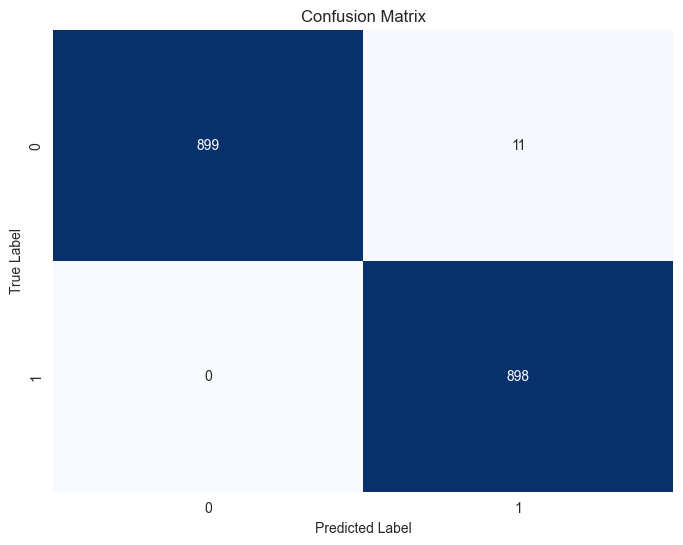

In [241]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [242]:
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, best_gb.predict_proba(X_test)[:, 1])

metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

metrics_table

,Metric,Score
0,Accuracy,0.993916
1,Precision,0.987899
2,Recall,1.000000
3,F1 Score,0.993913
4,ROC AUC,0.999891


## Performance comparison

In [201]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


y_pred_gb = grid_search_gb.best_estimator_.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

metrics_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Test Accuracy': [accuracy_logreg, accuracy_rf, accuracy_gb]
})

metrics_table

,Model,Test Accuracy
0,Logistic Regression,0.891040
1,Random Forest,0.996681
2,Gradient Boosting,0.995575


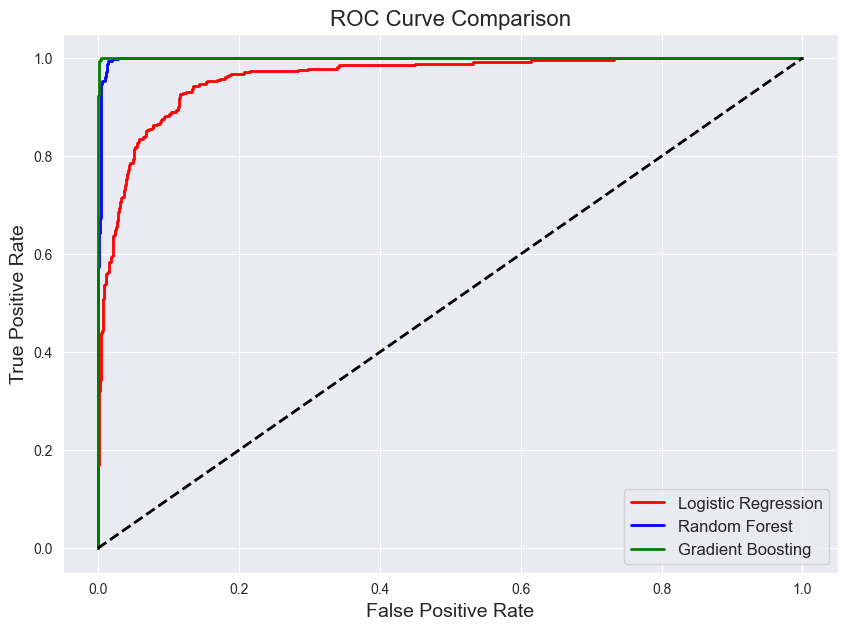

In [245]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for Logistic Regression, Random Forest, and Gradient Boosting
y_pred_logreg_proba = pipeline_logreg.predict_proba(X_test)[:, 1]  # Logistic Regression probabilities
y_pred_rf_proba = best_rf.predict_proba(X_test)[:, 1]  # Random Forest probabilities
y_pred_gb_proba = grid_search_gb.best_estimator_.predict_proba(X_test)[:, 1]  # Gradient Boosting probabilities

# Calculate ROC curve and AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_proba)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curves for all three models
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression', color='red', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest', color='blue', linewidth=2)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting', color='green', linewidth=2)

# Plot diagonal line for reference (no skill classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# Customize the plot
plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


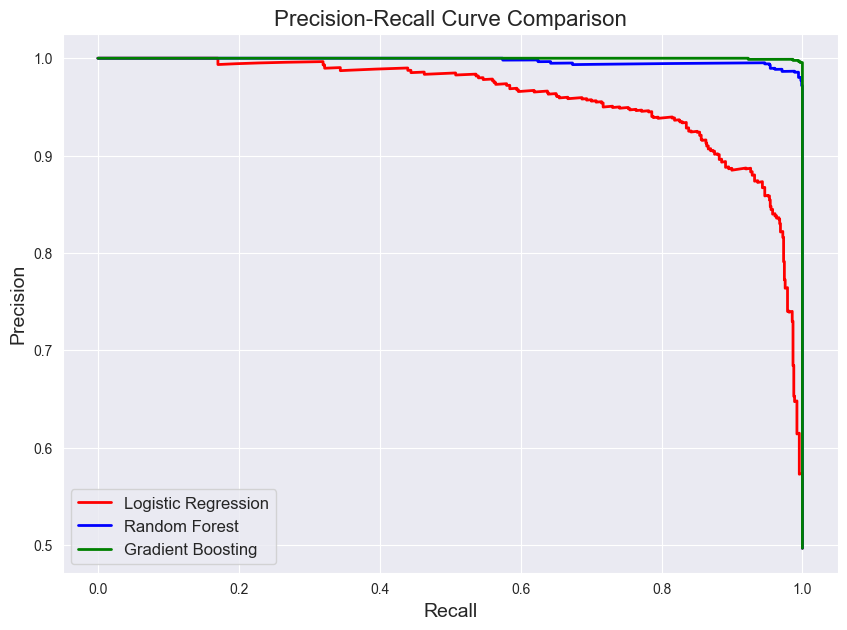

In [246]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for Logistic Regression
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_pred_logreg_proba)

# Calculate precision and recall for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf_proba)

# Calculate precision and recall for Gradient Boosting
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_gb_proba)

# Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 7))
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression', color='red', linewidth=2)
plt.plot(recall_rf, precision_rf, label='Random Forest', color='blue', linewidth=2)
plt.plot(recall_gb, precision_gb, label='Gradient Boosting', color='green', linewidth=2)

# Customize the plot
plt.title('Precision-Recall Curve Comparison', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


## Model interpretability

In [248]:
import shap

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


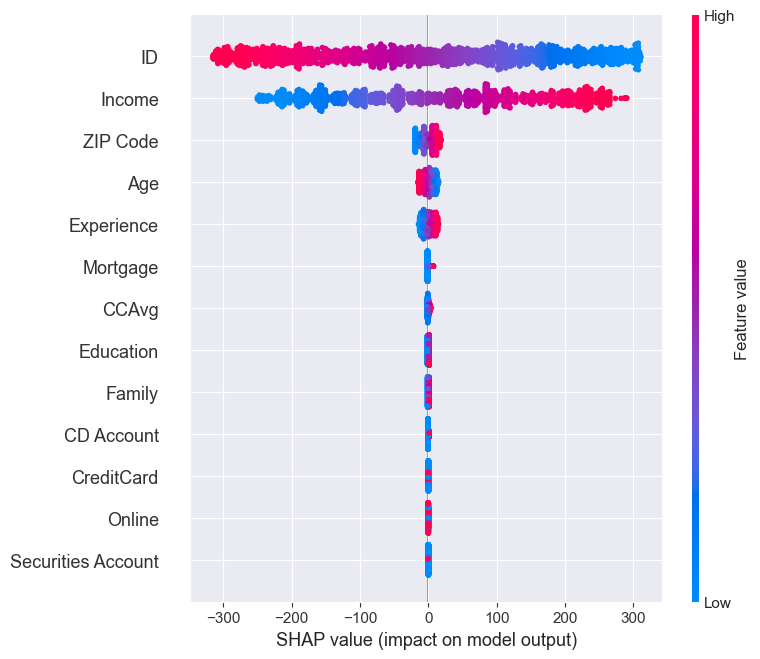

In [253]:

explainer_logreg = shap.LinearExplainer(pipeline_logreg.named_steps['logreg'], X_train, feature_perturbation="interventional")
shap_values_logreg = explainer_logreg.shap_values(X_test)
shap.summary_plot(shap_values_logreg, X_test, feature_names=X_test.columns)


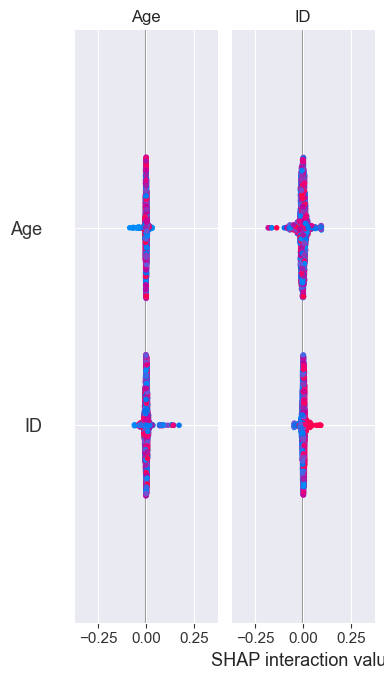

In [259]:
explainer_rf = shap.TreeExplainer(best_rf) 
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns)

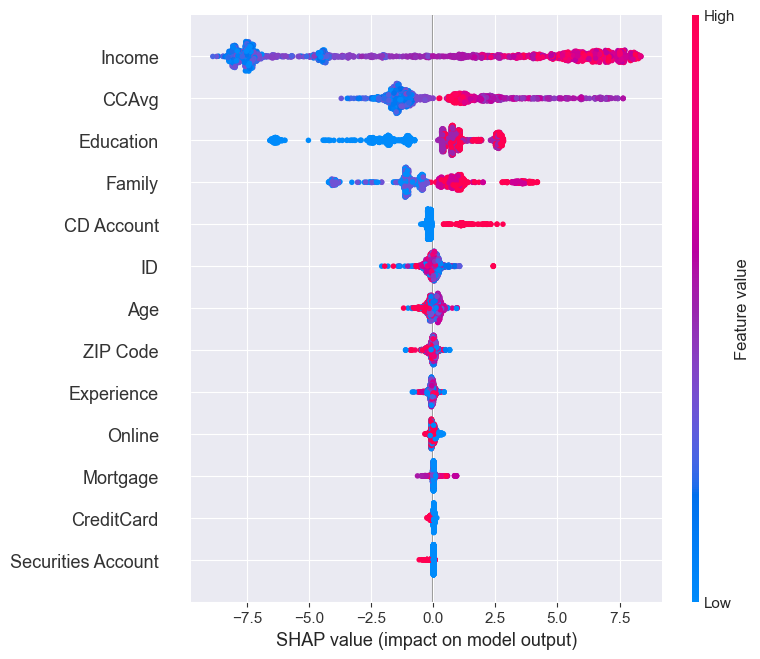

In [252]:

explainer_gb = shap.TreeExplainer(best_gb) 
shap_values_gb = explainer_gb.shap_values(X_test)
shap.summary_plot(shap_values_gb, X_test, feature_names=X_test.columns)
